# **t-SNE: Visualización de Datos Complejos en Espacios de Menor Dimensión**

#### **¿Qué es t-SNE?**
t-SNE (t-Distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad específicamente diseñada para la visualización de datos de alta dimensión. Desarrollada por Laurens van der Maaten y Geoffrey Hinton en 2008, esta técnica se ha convertido en una de las herramientas más populares para visualizar datos complejos.

#### **Propósito Principal**
El objetivo fundamental de t-SNE es tomar datos que existen en un espacio de muchas dimensiones y encontrar una representación significativa de estos datos en un espacio de menor dimensión (típicamente 2D o 3D) que pueda ser visualizado. A diferencia de otras técnicas de reducción de dimensionalidad, t-SNE se centra específicamente en preservar la estructura local de los datos.

#### **Características Clave**

- Preservación de Estructura Local

 - t-SNE intenta mantener juntos en la visualización los puntos que están cercanos en el espacio original
 - Prioriza la preservación de las relaciones de vecindad sobre las distancias globales


- No Linealidad
 - Puede capturar relaciones no lineales en los datos
 - Más flexible que métodos lineales como PCA


- Adaptabilidad
 - Se adapta automáticamente a la densidad de los datos
 - Puede revelar clusters y subestructuras en los datos

- Probabilístico
 - Convierte distancias en probabilidades
 - Utiliza una distribución t-Student para el mapeo de baja dimensión

#### **Ventajas y Limitaciones**
- Ventajas
 - Excelente para visualización de datos
 - Capaz de revelar clusters y estructuras
 - Preserva bien las relaciones locales
 - Intuitivo y visualmente interpretable

- Limitaciones
 - Computacionalmente intensivo
 - No preserva distancias globales
 - Resultados estocásticos (no determinísticos)
 - Requiere ajuste de hiperparámetros

#### **Importancia en el Campo del Análisis de Datos**
t-SNE ha revolucionado la forma en que visualizamos datos complejos, permitiendo:

- Descubrir patrones ocultos en los datos
- Validar hipótesis sobre estructuras de datos
- Comunicar resultados de manera efectiva
- Explorar relaciones en datos de alta dimensión

## **1. Fundamentos y Contexto**

### **1.1 Introducción a la Reducción de Dimensionalidad**

La reducción de dimensionalidad es una técnica fundamental en el análisis de datos modernos, especialmente cuando trabajamos con datos de alta dimensionalidad. Este proceso busca representar datos complejos en espacios de menor dimensión mientras preserva las características más importantes de los datos originales.

#### **El Problema de la Alta Dimensionalidad**

La alta dimensionalidad presenta varios desafíos:

- **Visualización**: Los humanos no podemos visualizar espacios de más de 3 dimensiones directamente.
- **Computación**: El costo computacional aumenta exponencialmente con las dimensiones.
- **Sparsidad**: Los datos se vuelven más dispersos en espacios de alta dimensión.

Veamos un ejemplo práctico de cómo los datos se distribuyen en diferentes dimensiones.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_swiss_roll, load_digits, fetch_openml, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from time import time
import warnings
warnings.filterwarnings('ignore')

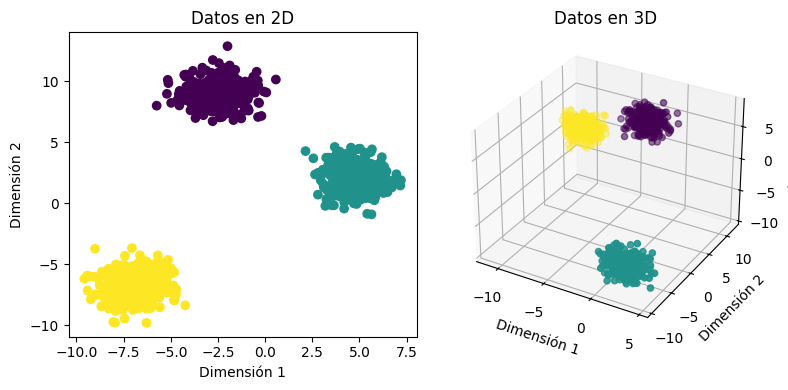

In [ ]:
# Generar datos con distribución normal
def generate_gaussian_data(n_samples, dims, n_clusters=3):
    """Genera datos gaussianos en diferentes dimensiones."""
    X, y = make_blobs(n_samples=n_samples,
                      n_features=dims,
                      centers=n_clusters,
                      cluster_std=1.0,
                      random_state=42)
    return X, y

# Generamos datos en 2D y 3D
X_2d, y_2d = generate_gaussian_data(1000, 2)
X_3d, y_3d = generate_gaussian_data(1000, 3)

# Visualización 2D
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap='viridis')
plt.title('Datos en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# Visualización 3D
ax = plt.subplot(122, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
                    c=y_3d, cmap='viridis')
plt.title('Datos en 3D')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')

plt.tight_layout()
plt.show()

La imagen muestra tres clusters de datos representados tanto en 2D (izquierda) como en 3D (derecha). Cada color (amarillo, morado y verde azulado) representa un grupo distinto de datos.

- La visualización ilustra claramente cómo los humanos podemos interpretar fácilmente datos en 2D y 3D.
- Los clusters están bien definidos en ambas representaciones, pero en dimensiones mayores a 3, estas visualizaciones directas serían imposibles.
- Esta comparación establece el punto de partida para entender por qué necesitamos técnicas de reducción de dimensionalidad para datos más complejos.

 #### **La Maldición de la Dimensionalidad**

 La maldición de la dimensionalidad se refiere a varios fenómenos que ocurren cuando trabajamos con datos en espacios de alta dimensión. Uno de los más notables es que el volumen del espacio crece exponencialmente con el número de dimensiones, haciendo que los datos se vuelvan cada vez más dispersos. Veamos cómo cambia el volumen de una esfera unitaria en diferentes dimensiones.

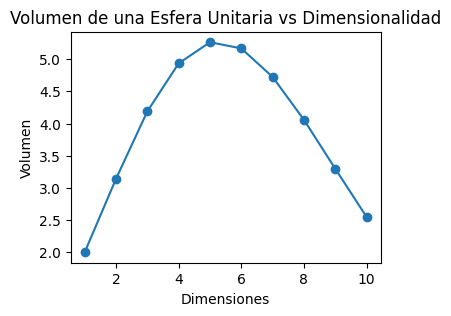

In [ ]:
def sphere_volume(dim):
    """Calcula el volumen de una esfera unitaria en d dimensiones."""
    return (np.pi ** (dim/2)) / np.math.gamma(dim/2 + 1)

dims = np.arange(1, 11)
volumes = [sphere_volume(d) for d in dims]

plt.figure(figsize=(4, 3))
plt.plot(dims, volumes, 'o-')
plt.title('Volumen de una Esfera Unitaria vs Dimensionalidad')
plt.xlabel('Dimensiones')
plt.ylabel('Volumen')
plt.grid(False)
plt.show()

La imagen muestra cómo varía el volumen de una esfera unitaria a medida que aumenta el número de dimensiones (de 1 a 10).

- Sorprendentemente, el volumen aumenta hasta aproximadamente 5-6 dimensiones, y luego comienza a disminuir.
- Este fenómeno ilustra la "maldición de la dimensionalidad": a medida que aumentan las dimensiones, los datos se vuelven más dispersos en el espacio.
- Esta dispersión hace que los conceptos de "cercanía" o "similitud" pierdan significado en espacios de alta dimensión, complicando el análisis.
- Justifica la necesidad de técnicas como t-SNE que preservan relaciones de similitud en espacios de menor dimensión.

### **1.2 Técnicas Clásicas de Reducción de Dimensionalidad**

Antes de profundizar en t-SNE, es importante entender las técnicas clásicas de reducción de dimensionalidad:

**1. PCA (Análisis de Componentes Principales)**:
  - Busca direcciones de máxima varianza
  - Transformación lineal
  - Preserva distancias globales

**2. MDS (Escalamiento Multidimensional)**:
  - Preserva distancias entre pares de puntos
  - Puede ser métrico o no métrico

Veamos un ejemplo comparativo usando datos sintéticos.

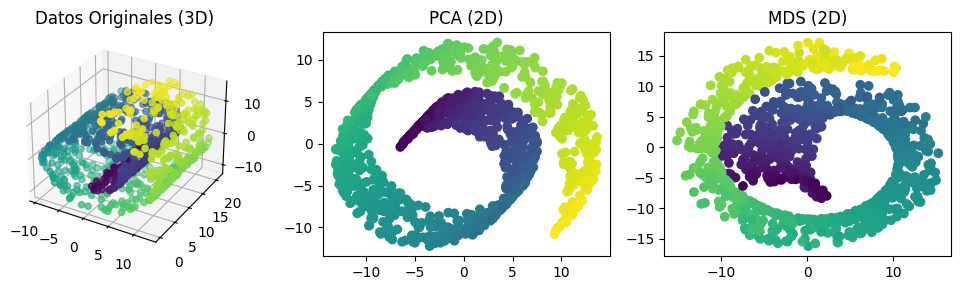

In [ ]:
# Generamos datos tipo "Swiss Roll"
X, color = make_swiss_roll(n_samples=1000, random_state=42)

# Aplicamos PCA y MDS
pca = PCA(n_components=2)
mds = MDS(n_components=2, random_state=42)

X_pca = pca.fit_transform(X)
X_mds = mds.fit_transform(X)

# Visualización
fig = plt.figure(figsize=(10, 3))

# Datos originales 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
ax1.set_title('Datos Originales (3D)')

# Resultado PCA
ax2 = fig.add_subplot(132)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='viridis')
ax2.set_title('PCA (2D)')

# Resultado MDS
ax3 = fig.add_subplot(133)
ax3.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap='viridis')
ax3.set_title('MDS (2D)')

plt.tight_layout()
plt.show()

Esta visualización compara tres representaciones de un conjunto de datos tipo "Swiss Roll": los datos originales en 3D (izquierda), reducción con PCA a 2D (centro) y reducción con MDS a 2D (derecha).

- PCA, como método lineal, no logra mantener la estructura enrollada original, "aplanando" la espiral.
- MDS preserva mejor la estructura global, manteniendo la forma de anillo, pero con cierta distorsión.
- Esta comparación destaca las limitaciones de los métodos lineales como PCA frente a datos con relaciones no lineales.
- Establece el contexto para introducir t-SNE, que maneja mejor las relaciones no lineales.

## **2. Fundamentos Matemáticos de t-SNE**

### **2.1 Distribución de Probabilidades en el Espacio Original**

t-SNE comienza definiendo una distribución de probabilidad sobre pares de puntos en el espacio de alta dimensión. Para cada par de puntos $x_i$ y $x_j$, se define una probabilidad condicional $p_{j|i}$:

$$p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}$$

Donde $\sigma_i$ es la varianza de la distribución gaussiana centrada en $x_i$. Veamos cómo se calculan estas probabilidades.

### **2.2 Distribución t-Student en el Espacio Reducido**

En el espacio de baja dimensión, t-SNE utiliza una distribución t-Student con un grado de libertad para calcular las similitudes entre puntos. La probabilidad $q_{ij}$ se define como:

$$q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}$$

Donde $y_i$ y $y_j$ son las representaciones de los puntos en el espacio de baja dimensión. Veamos la diferencia entre las distribuciones Gaussiana y t-Student. La distribución t-Student tiene "colas más pesadas" que la distribución Gaussiana, lo que significa que:

- Es más robusta a valores atípicos
- Permite una mejor separación de clusters
- Ayuda a evitar el "crowding problem" en el espacio de baja dimensión

Esta es una de las razones principales por las que t-SNE es más efectivo que otras técnicas para visualización de datos de alta dimensionalidad.

## **3. Algoritmo t-SNE**

### **3.1 Funcionamiento del Algoritmo**

El algoritmo t-SNE se basa en dos pasos principales:
1. Cálculo de probabilidades en el espacio de alta dimensión
2. Optimización en el espacio de baja dimensión

#### **Función de Costo**
La función objetivo que t-SNE minimiza es la divergencia de Kullback-Leibler:

$$C = KL(P||Q) = \sum_i \sum_j p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

#### **Gradiente**
El gradiente para la optimización está dado por:

$$\frac{\delta C}{\delta y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j)(1 + ||y_i - y_j||^2)^{-1}$$

### **3.2 Complejidad Computacional**

Veamos cómo el tiempo de ejecución varía con el tamaño del conjunto de datos.

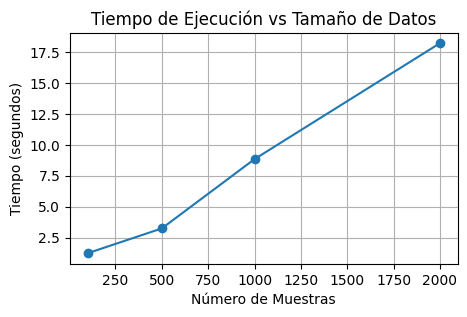

In [ ]:
# Complejidad del algotimor t-sne
def measure_tsne_complexity():
    """
    Mide el tiempo de ejecución de t-SNE para diferentes tamaños de datos
    """
    sample_sizes = [100, 500, 1000, 2000]
    times = []

    for n_samples in sample_sizes:
        # Genera datos
        X, _ = make_blobs(n_samples=n_samples, n_features=50, random_state=42)

        # Mide tiempo de ejecución
        start_time = time()
        TSNE(n_components=2, random_state=42).fit_transform(X)
        times.append(time() - start_time)

    plt.figure(figsize=(5, 3))
    plt.plot(sample_sizes, times, 'o-')
    plt.title('Tiempo de Ejecución vs Tamaño de Datos')
    plt.xlabel('Número de Muestras')
    plt.ylabel('Tiempo (segundos)')
    plt.grid(True)
    plt.show()

measure_tsne_complexity()

La imagen muestra un gráfico de líneas que ilustra la relación entre el tiempo de ejecución (en segundos) del algoritmo t-SNE y el número de muestras de datos procesadas. El tiempo de ejecución aumenta considerablemente a medida que se incrementa el número de muestras. Esta visualización demuestra claramente la complejidad computacional del algoritmo t-SNE, que es uno de sus principales desafíos. El crecimiento no es lineal sino aproximadamente cuadrático, lo que significa que duplicar el tamaño de los datos más que duplica el tiempo de ejecución. Esta característica es crítica para planificar análisis con conjuntos de datos grandes, ya que el tiempo de procesamiento puede volverse prohibitivo rápidamente a medida que el volumen de datos aumenta.

## **4. Aspectos Prácticos y Consideraciones**

### **4.1 Parámetros Importantes**

#### **4.1.1 Perplejidad**
La perplejidad es un parámetro que balancea la atención entre aspectos locales y globales de los datos. Es uno de los parámetros más importantes en t-SNE y matemáticamente se define como:

$$Perp(P_i) = 2^{H(P_i)}$$

donde $H(P_i)$ es la entropía de la distribución condicional $P_i$:

$$H(P_i) = -\sum_j p_{j|i} \log_2 p_{j|i}$$

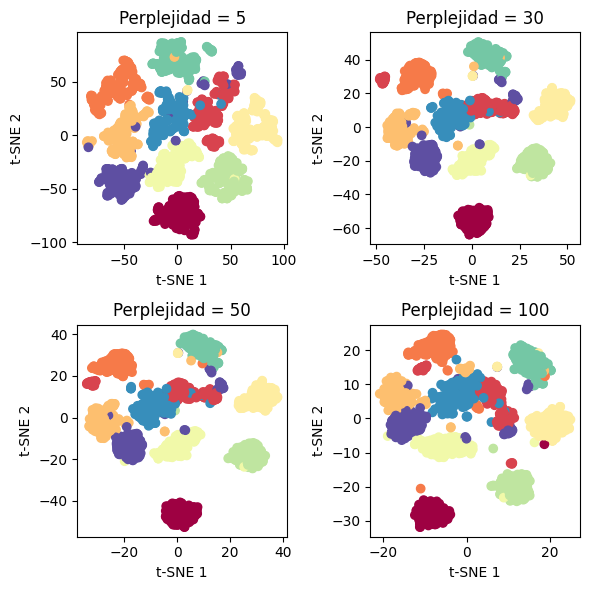

In [ ]:
def compare_perplexities():
    """
    Compara resultados de t-SNE con diferentes perplejidades
    """
    # Carga el conjunto de datos de dígitos
    digits = load_digits()
    X = digits.data
    y = digits.target

    perplexities = [5, 30, 50, 100]
    fig, axes = plt.subplots(2, 2, figsize=(6.5, 6))
    axes = axes.ravel()

    for idx, perp in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
        Y = tsne.fit_transform(X)

        axes[idx].scatter(Y[:, 0], Y[:, 1], c=y, cmap='Spectral')
        axes[idx].set_title(f'Perplejidad = {perp}')
        axes[idx].set_xlabel('t-SNE 1')
        axes[idx].set_ylabel('t-SNE 2')

    plt.tight_layout()
    plt.show()

compare_perplexities()

La imagen muestra cuatro visualizaciones t-SNE del conjunto de datos de dígitos MNIST usando diferentes valores de perplejidad: 5, 30, 50 y 100. Cada color representa un dígito diferente.

**Insights relevantes**

- Con perplejidad baja (5), se observan muchos clusters pequeños y fragmentados. El algoritmo se enfoca en preservar relaciones muy locales.
- Con perplejidad media (30-50), se logra un equilibrio donde los dígitos similares se agrupan mientras mantienen distancia de otros grupos.
- Con perplejidad alta (100), los grupos comienzan a mezclarse, perdiendo algunas distinciones importantes entre categorías similares.
- Este parámetro actúa como un "zoom" que controla si el algoritmo prioriza relaciones locales o globales.
- Para análisis exploratorio, es recomendable probar múltiples valores de perplejidad para entender diferentes aspectos de los datos.

#### **4.1.2 Tasa de Aprendizaje (Learning Rate)**

La tasa de aprendizaje controla el tamaño de los pasos durante la optimización.

$$y_i^{(t+1)} = y_i^{(t)} - \eta \frac{\partial C}{\partial y_i}$$

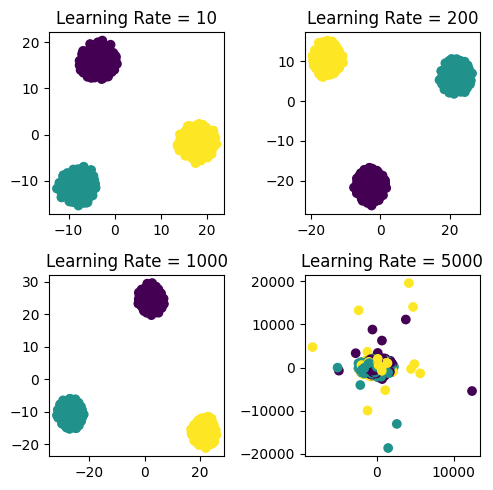

In [ ]:
def compare_learning_rates():
    """Visualiza el efecto de diferentes tasas de aprendizaje"""
    X, y = make_blobs(n_samples=500, n_features=50, centers=3, random_state=42)

    learning_rates = [10, 200, 1000, 5000]
    fig, axes = plt.subplots(2, 2, figsize=(5.5, 5))
    axes = axes.ravel()

    for idx, lr in enumerate(learning_rates):
        tsne = TSNE(n_components=2, learning_rate=lr, random_state=42)
        Y = tsne.fit_transform(X)

        axes[idx].scatter(Y[:, 0], Y[:, 1], c=y, cmap='viridis')
        axes[idx].set_title(f'Learning Rate = {lr}')

    plt.tight_layout()
    plt.show()

compare_learning_rates()

La imagen muestra cuatro visualizaciones que muestran cómo diferentes tasas de aprendizaje (10, 200, 1000, 5000) afectan los resultados de t-SNE en datos de clusters.

**Insights relevantes**

- Con tasa de aprendizaje muy baja (10), los clusters apenas se separan, resultando en una visualización poco informativa.
- Con tasa de aprendizaje moderada (200-1000), los clusters se separan claramente, manteniendo su integridad.
- Con tasa excesivamente alta (5000), la visualización se vuelve inestable, creando patrones dispersos y distorsionados.
- La selección de este parámetro es crucial: valores muy bajos conducen a convergencia lenta o subóptima, mientras que valores muy altos causan "explosiones" en la visualización.
- Un valor óptimo depende del tamaño y complejidad del conjunto de datos.

#### **4.1.3 Número de Iteraciones**

El número de iteraciones afecta la convergencia del algoritmo.

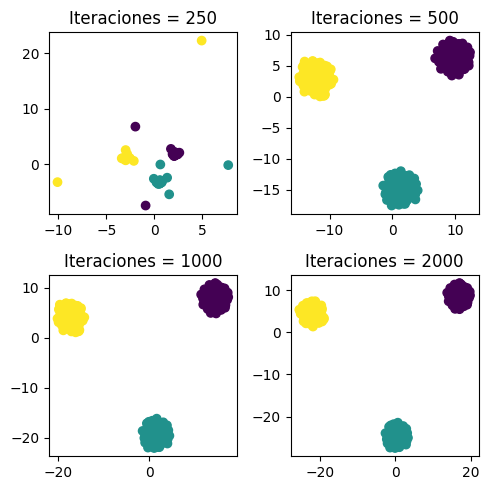

In [ ]:
def analyze_iterations():
    """Analiza el efecto del número de iteraciones"""
    X, y = make_blobs(n_samples=300, n_features=50, centers=3, random_state=42)

    iterations = [250, 500, 1000, 2000]
    fig, axes = plt.subplots(2, 2, figsize=(5.5, 5))
    axes = axes.ravel()

    for idx, n_iter in enumerate(iterations):
        tsne = TSNE(n_components=2, n_iter=n_iter, random_state=42)
        Y = tsne.fit_transform(X)

        axes[idx].scatter(Y[:, 0], Y[:, 1], c=y, cmap='viridis')
        axes[idx].set_title(f'Iteraciones = {n_iter}')

    plt.tight_layout()
    plt.show()

analyze_iterations()

Esta imagen muestra cuatro gráficos que muestran cómo el número de iteraciones (250, 500, 1000, 2000) afecta la convergencia del algoritmo t-SNE.

**Insights relevantes**

- Con pocas iteraciones (250), la estructura apenas comienza a formarse, con puntos dispersos sin patrón claro.
- A 500 iteraciones, los clusters comienzan a definirse pero aún no están completamente separados.
- Con 1000-2000 iteraciones, la estructura se estabiliza con clusters bien definidos y consistentes.
- Este parámetro controla el "tiempo de cocción" del algoritmo; insuficientes iteraciones producen resultados subóptimos.
- Para datos complejos, valores más altos (>1000) suelen ser necesarios, pero conllevan mayor costo computacional.

### **4.2 Métricas de Evaluación en t-SNE**

Examinaremos las principales metricas de evaluación en t-SNE.

### **4.2.1 Preservación de Vecindad (Neighborhood Preservation)**
La preservación de vecindad mide cuánto se mantienen las relaciones de proximidad entre puntos después de la reducción dimensional. Es decir, evalúa si los puntos que eran vecinos en el espacio original siguen siendo vecinos en el espacio reducido.
- **Idea Principal**: si dos puntos son vecinos en el espacio original, deberían seguir siendo vecinos en la visualización t-SNE
- **Rango**: va de 0 (ningún vecino preservado) a 1 (todos los vecinos preservados)
- **Interpretación**: un valor alto indica que la estructura local se mantiene bien

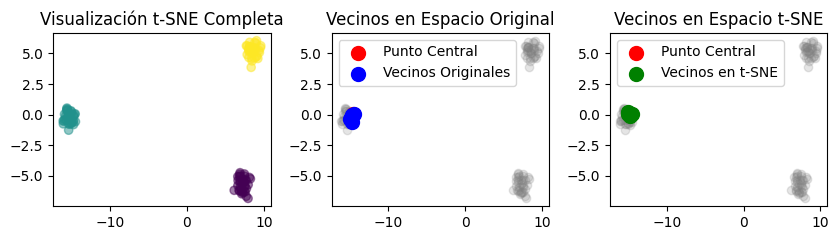

Tasa de preservación para el punto de ejemplo: 0.60


In [ ]:
def demonstrate_neighborhood_preservation():
    """
    Demuestra visualmente el concepto de preservación de vecindad.
    """
    # Genera datos sintéticos
    X, y = make_blobs(n_samples=100, n_features=3, centers=3, random_state=42)

    # Aplica t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Calcula vecinos más cercanos en espacio original
    k = 5  # número de vecinos a considerar
    nn_orig = NearestNeighbors(n_neighbors=k + 1)  # +1 porque incluye el punto mismo
    nn_orig.fit(X)

    # Selecciona un punto de ejemplo
    point_idx = 50
    _, neighbors_orig = nn_orig.kneighbors(X[point_idx:point_idx+1])
    neighbors_orig = neighbors_orig[0][1:]  # excluye el punto mismo

    # Visualiza en espacio t-SNE
    plt.figure(figsize=(8.5, 2.5))

    # Plot 1: Todos los puntos
    plt.subplot(131)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.title('Visualización t-SNE Completa')

    # Plot 2: Punto seleccionado y sus vecinos originales
    plt.subplot(132)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='gray', alpha=0.2)
    plt.scatter(X_tsne[point_idx, 0], X_tsne[point_idx, 1], c='red', s=100, label='Punto Central')
    plt.scatter(X_tsne[neighbors_orig, 0], X_tsne[neighbors_orig, 1], c='blue', s=100, label='Vecinos Originales')
    plt.title('Vecinos en Espacio Original')
    plt.legend()

    # Plot 3: Vecinos en espacio t-SNE
    nn_tsne = NearestNeighbors(n_neighbors=k+1)
    nn_tsne.fit(X_tsne)
    _, neighbors_tsne = nn_tsne.kneighbors(X_tsne[point_idx:point_idx+1])
    neighbors_tsne = neighbors_tsne[0][1:]

    plt.subplot(133)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='gray', alpha=0.2)
    plt.scatter(X_tsne[point_idx, 0], X_tsne[point_idx, 1], c='red', s=100, label='Punto Central')
    plt.scatter(X_tsne[neighbors_tsne, 0], X_tsne[neighbors_tsne, 1], c='green', s=100, label='Vecinos en t-SNE')
    plt.title('Vecinos en Espacio t-SNE')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Calcula tasa de preservación para el punto de ejemplo
    preserved = len(set(neighbors_orig) & set(neighbors_tsne))
    preservation_rate = preserved / k
    print(f"Tasa de preservación para el punto de ejemplo: {preservation_rate:.2f}")

demonstrate_neighborhood_preservation()

La imagen muestra tres gráficos mostrando todos los datos visualizados con t-SNE (izquierda), un punto central con sus vecinos en el espacio original (centro), y el mismo punto con sus vecinos en el espacio t-SNE (derecha).

**Insights relevantes**

- La tasa de preservación de 0.60 indica que 60% de los vecinos originales se mantienen cerca en la visualización t-SNE.
- Esta métrica proporciona una evaluación cuantitativa de cuán bien t-SNE preserva relaciones locales.
- La preservación perfecta es rara vez posible, y valores superiores a 0.5 generalmente indican un buen resultado.
- Este concepto es fundamental para entender la calidad de la visualización t-SNE más allá de la simple inspección visual.








### **4.2.2 Score de Silueta (Silhouette Score)**
 El score de silueta mide qué tan similar es un punto a su propio cluster en comparación con otros clusters. Este score ayuda a evaluar la calidad de la separación entre clusters.

Para cada punto i, el score de silueta se calcula como:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Donde:
- $a(i)$ es la distancia media al resto de puntos en el mismo cluster
- $b(i)$ es la distancia media al cluster más cercano

El score de silueta va de -1 a 1:
 * 1: Clusters bien definidos
 * 0: Clusters solapados
 * -1: Puntos asignados al cluster equivocado


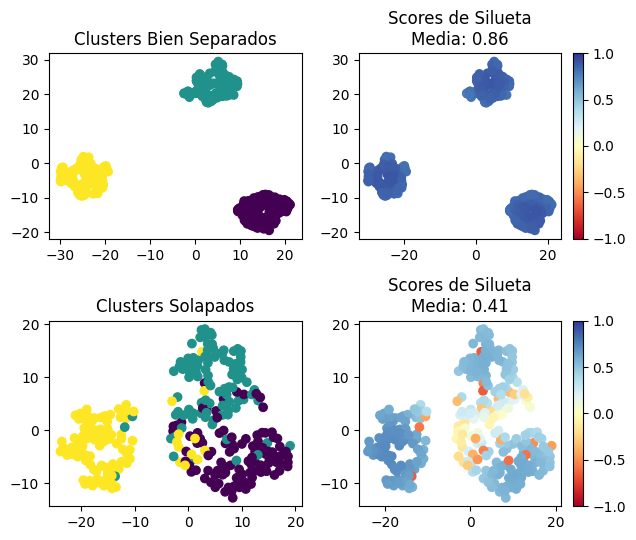

In [7]:
def demonstrate_silhouette():
    """
    Demuestra visualmente el concepto de score de silueta.
    """
    from sklearn.metrics import silhouette_samples

    # Genera datos con diferentes separaciones de clusters
    n_samples = 300

    # Caso 1: Clusters bien separados
    X1, y1 = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0,
                        random_state=42)
    tsne1 = TSNE(random_state=42).fit_transform(X1)

    # Caso 2: Clusters solapados
    X2, y2 = make_blobs(n_samples=n_samples, centers=3, cluster_std=5.0,
                        random_state=42)
    tsne2 = TSNE(random_state=42).fit_transform(X2)

    fig, axes = plt.subplots(2, 2, figsize=(6.5, 5.5))

    # Visualiza clusters bien separados
    silhouette_vals1 = silhouette_samples(tsne1, y1)
    scatter1 = axes[0,0].scatter(tsne1[:, 0], tsne1[:, 1], c=y1, cmap='viridis')
    axes[0,0].set_title('Clusters Bien Separados')
    # plt.colorbar(scatter1, ax=axes[0,0])

    # Visualiza sus scores de silueta
    scatter2 = axes[0,1].scatter(tsne1[:, 0], tsne1[:, 1], c=silhouette_vals1,
                                cmap='RdYlBu', vmin=-1, vmax=1)
    axes[0,1].set_title(f'Scores de Silueta\nMedia: {silhouette_vals1.mean():.2f}')
    plt.colorbar(scatter2, ax=axes[0,1])

    # Visualiza clusters solapados
    silhouette_vals2 = silhouette_samples(tsne2, y2)
    scatter3 = axes[1,0].scatter(tsne2[:, 0], tsne2[:, 1], c=y2, cmap='viridis')
    axes[1,0].set_title('Clusters Solapados')
    # plt.colorbar(scatter3, ax=axes[1,0])

    # Visualiza sus scores de silueta
    scatter4 = axes[1,1].scatter(tsne2[:, 0], tsne2[:, 1], c=silhouette_vals2,
                                cmap='RdYlBu', vmin=-1, vmax=1)
    axes[1,1].set_title(f'Scores de Silueta\nMedia: {silhouette_vals2.mean():.2f}')
    plt.colorbar(scatter4, ax=axes[1,1])

    plt.tight_layout()
    plt.show()

demonstrate_silhouette()

Esta imagen muestra visualizaciones que comparan clusters bien separados (fila superior) y clusters solapados (fila inferior), junto con sus correspondientes scores de silueta codificados por colores.

**Insights relevantes**

- Para clusters bien separados, el score de silueta promedio es alto (0.86), con la mayoría de puntos en azul (valores positivos altos).
- Para clusters solapados, el score medio es más bajo (0.41), con muchos puntos en tonos amarillos o rojos (valores bajos o negativos).
- Un alto score de silueta indica que los puntos están correctamente agrupados con sus similares.
- Esta métrica ayuda a evaluar objetivamente si la visualización t-SNE está generando agrupaciones significativas.
- Es particularmente útil cuando no tenemos etiquetas previas para los datos.

### **4.3 Interpretación de Resultados**

Examinaremos la interpretación de resultados t-SNE a través de diferentes tipos de datos y métricas.

#### **4.3.1 Generación de Datos de Prueba**

Generamos tres tipos diferentes de datos para comparar cómo t-SNE maneja diferentes estructuras:

- **Clusters Bien Definidos**: simulan datos con grupos claramente separados
    - Útil para evaluar la capacidad de t-SNE para separar grupos distintos
    - Sirve como caso base para validar el funcionamiento del algoritmo

- **Estructura Continua**: representa datos con variación gradual
    - Evalúa cómo t-SNE maneja transiciones suaves
    - Importante para datos temporales o secuenciales

- **Datos Reales (MNIST)**: dígitos escritos a mano
    - Prueba el comportamiento con datos del mundo real
    - Permite evaluar la preservación de características semánticas

In [ ]:
def generate_datasets():
    """
    Genera tres conjuntos de datos diferentes para análisis comparativo.

    Returns:
        tuple: Tres pares de (X, y) para diferentes tipos de datos
    """
    # Clusters bien definidos - útiles para validar separación de grupos
    X_blobs, y_blobs = make_blobs(n_samples=500, n_features=50,
                                 centers=5, cluster_std=1.0,
                                 random_state=42)

    # Estructura continua - evalúa preservación de continuidad
    t = np.linspace(0, 10, 500)
    X_curve = np.column_stack([
        np.sin(t) + np.random.normal(0, 0.1, 500),
        np.cos(t) + np.random.normal(0, 0.1, 500),
        t + np.random.normal(0, 0.1, 500)
    ])
    y_curve = t

    # Datos reales - prueba con complejidad real
    digits = load_digits()
    X_digits = digits.data[:500]
    y_digits = digits.target[:500]

    return (X_blobs, y_blobs), (X_curve, y_curve), (X_digits, y_digits)

#### **4.3.2 Análisis con Diferentes Perplejidades**

Este análisis compara cómo diferentes valores de perplejidad afectan la visualización:
- Perplejidad baja (5): Enfatiza estructuras locales
- Perplejidad alta (50): Preserva estructuras globales

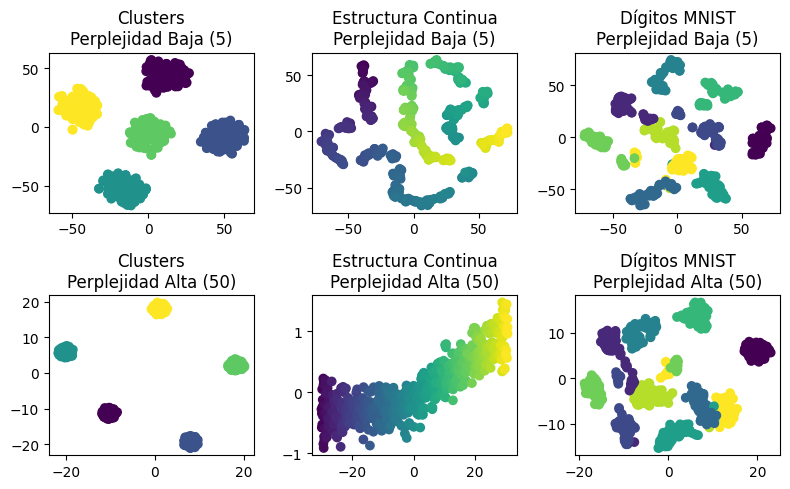

In [ ]:
def analyze_dataset_reduction():
    """
    Analiza embeddings t-SNE para diferentes datasets y perplejidades,
    compara estructuras locales vs globales y calcula métricas de calidad.
    """
    datasets = generate_datasets()
    names = ['Clusters', 'Estructura Continua', 'Dígitos MNIST']

    fig, axes = plt.subplots(2, 3, figsize=(8, 5))
    metrics = []

    for idx, ((X, y), name) in enumerate(zip(datasets, names)):
        # Comparación de perplejidades
        perp_low = TSNE(perplexity=5, random_state=42).fit_transform(X)
        perp_high = TSNE(perplexity=50, random_state=42).fit_transform(X)

        # Visualización comparativa
        axes[0, idx].scatter(perp_low[:, 0], perp_low[:, 1], c=y, cmap='viridis')
        axes[0, idx].set_title(f'{name}\nPerplejidad Baja (5)')

        axes[1, idx].scatter(perp_high[:, 0], perp_high[:, 1], c=y, cmap='viridis')
        axes[1, idx].set_title(f'{name}\nPerplejidad Alta (50)')

        # Cálculo de métricas de calidad
        metrics.append({
            'Dataset': name,
            'Silhouette (Perp=5)': silhouette_score(perp_low, y) if name != 'Estructura Continua' else np.nan,
            'Silhouette (Perp=50)': silhouette_score(perp_high, y) if name != 'Estructura Continua' else np.nan
        })

    plt.tight_layout()
    plt.show()

analyze_dataset_reduction()

Esta imagen muestra una matriz de visualizaciones comparando tres tipos de datos (Clusters, Estructura Continua, Dígitos MNIST) con dos niveles de perplejidad (baja y alta).

**Insights relevantes**

- Para datos con clusters bien definidos, la perplejidad alta tiende a mantener los grupos más compactos y separados.
- Para estructuras continuas (como la curva/espiral), la perplejidad alta mantiene mejor la secuencia natural de los datos.
- Para datos complejos como MNIST, la perplejidad debe balancearse: muy baja fragmenta excesivamente, muy alta puede perder estructura importante.
- No existe un valor "óptimo" universal; la selección depende de la naturaleza de los datos y el objetivo del análisis.
- Esta comparación demuestra por qué es importante experimentar con diferentes configuraciones.

#### **4.3.3 Análisis de Preservación Topológica**

Este análisis evalúa cuánto se mantienen las relaciones entre puntos cercanos y la separación entre clusters:
- Mide la preservación de vecindad
- Mide el score de silueta

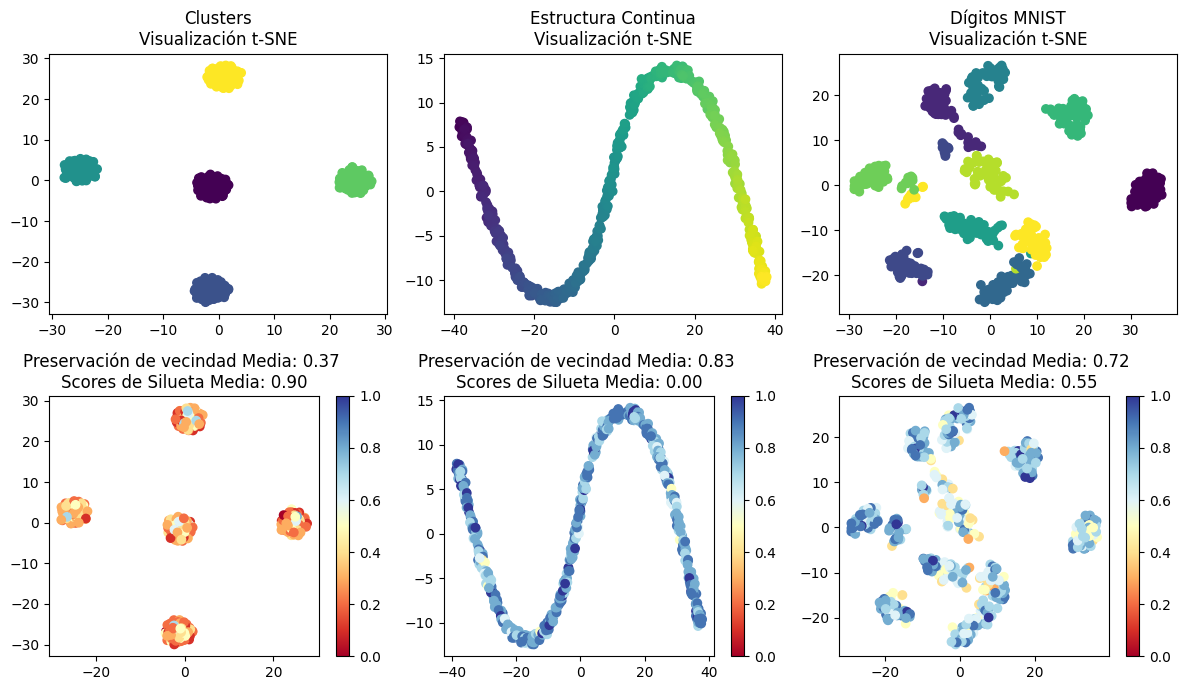

In [ ]:
def analyze_topology_preservation(X, X_reduced, k=10):
    """
    Calcula qué tan bien se preservan las relaciones de vecindad.

    Args:
        X: Datos originales
        X_reduced: Datos después de t-SNE
        k: Número de vecinos a considerar

    Returns:
        array: Tasas de preservación por punto
    """
    # Vecinos en espacio original
    knn_orig = NearestNeighbors(n_neighbors=k)
    knn_orig.fit(X)
    dist_orig, idx_orig = knn_orig.kneighbors()

    # Vecinos en espacio embebido
    knn_emb = NearestNeighbors(n_neighbors=k)
    knn_emb.fit(X_reduced)
    dist_emb, idx_emb = knn_emb.kneighbors()

    # Cálculo de preservación
    preservation_rates = []
    for i in range(len(X)):
        preserved = len(set(idx_orig[i]) & set(idx_emb[i]))
        preservation_rates.append(preserved / k)

    return np.array(preservation_rates)

def visualize_preservation_analysis():
    """
    Visualiza la preservación de estructura para cada tipo de dato.
    Muestra tanto el embedding como su calidad de preservación.
    """
    from sklearn.metrics import silhouette_samples

    datasets = generate_datasets()
    names = ['Clusters', 'Estructura Continua', 'Dígitos MNIST']

    fig, axes = plt.subplots(2, 3, figsize=(12, 7))

    for idx, ((X, y), name) in enumerate(zip(datasets, names)):
        tsne = TSNE(random_state=42)
        X_reduced = tsne.fit_transform(X)
        preservation = analyze_topology_preservation(X, X_reduced)
        try:
            silhouette_val = silhouette_score(X_reduced, y)
        except:
            silhouette_val = 0.00

        # Datos original
        axes[0, idx].scatter(X_reduced[:, 0], X_reduced[:, 1],
                           c=y, cmap='viridis')
        axes[0, idx].set_title(f'{name}\nVisualización t-SNE')

        # Mapa de preservación
        scatter = axes[1, idx].scatter(X_reduced[:, 0], X_reduced[:, 1],
                                     c=preservation, cmap='RdYlBu',
                                     vmin=0, vmax=1)
        axes[1, idx].set_title(f'Preservación de vecindad Media: {np.mean(preservation):.2f} \nScores de Silueta Media: {silhouette_val:.2f}')
        plt.colorbar(scatter, ax=axes[1, idx])

    plt.tight_layout()
    plt.show()

visualize_preservation_analysis()

La imagen muestra visualizaciones que muestran el análisis de calidad de t-SNE para diferentes conjuntos de datos, con mapas de calor representando la tasa de preservación de vecindad.

**Insights relevantes**

- La estructura continua (espiral) muestra la mayor preservación (0.83), indicando que t-SNE es excelente para datos secuenciales.
- Los dígitos MNIST también muestran buena preservación (0.72), pero los clusters artificiales tienen menor preservación (0.37).
- El alto score de silueta (0.90) para los clusters indica que, aunque la preservación exacta de vecinos es menor, la estructura de agrupación se mantiene.
- Este análisis demuestra que t-SNE puede priorizar diferentes aspectos de los datos (agrupación vs. relaciones exactas de vecindad).
- Para interpretación correcta, debemos considerar tanto la preservación de vecindad como la formación de clusters.

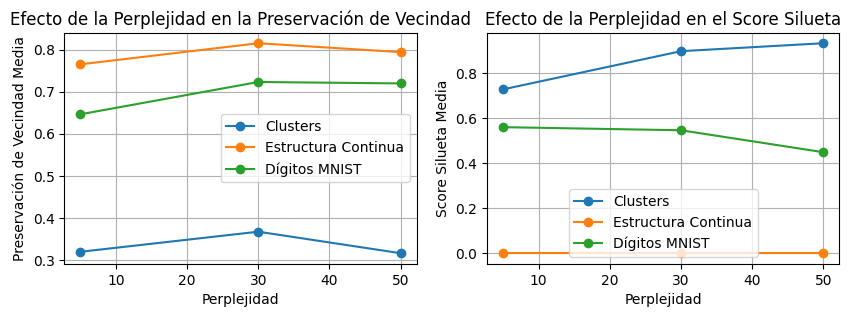

            Dataset  Perplejidad  Preservación Media  Preservación Std  Silhouette
           Clusters            5              0.3196          0.127184    0.729020
           Clusters           30              0.3674          0.148315    0.898888
           Clusters           50              0.3162          0.142960    0.934291
Estructura Continua            5              0.7654          0.129857    0.000000
Estructura Continua           30              0.8156          0.105246    0.000000
Estructura Continua           50              0.7944          0.109401    0.000000
      Dígitos MNIST            5              0.6466          0.153520    0.560844
      Dígitos MNIST           30              0.7234          0.147623    0.547044
      Dígitos MNIST           50              0.7200          0.152709    0.449398


In [ ]:
def compute_detailed_metrics():
    """
    Calcula métricas detalladas para cada configuración.
    Evalúa el impacto de la perplejidad y tipo de dato en la calidad.
    """
    datasets = generate_datasets()
    names = ['Clusters', 'Estructura Continua', 'Dígitos MNIST']
    results = []

    for (X, y), name in zip(datasets, names):
        # Evaluación con diferentes perplejidades
        perp_values = [5, 30, 50]
        for perp in perp_values:
            tsne = TSNE(perplexity=perp, random_state=42)
            X_reduced = tsne.fit_transform(X)
            preservation = analyze_topology_preservation(X, X_reduced)

            results.append({
                'Dataset': name,
                'Perplejidad': perp,
                'Preservación Media': np.mean(preservation),
                'Preservación Std': np.std(preservation),
                'Silhouette': silhouette_score(X_reduced, y) if name != 'Estructura Continua' else 0.00
            })

    df_results = pd.DataFrame(results)

    # Visualización de resultados
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    # plt.figure(figsize=(5, 3))
    for name in names:
        df_subset = df_results[df_results['Dataset'] == name]
        axes[0].plot(df_subset['Perplejidad'], df_subset['Preservación Media'],
                'o-', label=name)

    axes[0].set_xlabel('Perplejidad')
    axes[0].set_ylabel('Preservación de Vecindad Media')
    axes[0].set_title('Efecto de la Perplejidad en la Preservación de Vecindad')
    axes[0].legend()
    axes[0].grid(True)

    for name in names:
        df_subset = df_results[df_results['Dataset'] == name]
        axes[1].plot(df_subset['Perplejidad'], df_subset['Silhouette'],
                'o-', label=name)

    axes[1].set_xlabel('Perplejidad')
    axes[1].set_ylabel('Score Silueta Media')
    axes[1].set_title('Efecto de la Perplejidad en el Score Silueta')
    axes[1].legend()
    axes[1].grid(True)
    plt.show()

    return df_results

metrics_df = compute_detailed_metrics()
print(metrics_df.to_string(index=False))

La imagen muestra dos gráficos de líneas mostrando cómo la perplejidad afecta la preservación de vecindad y el score de silueta para diferentes tipos de datos.

- Para estructuras continuas, aumentar la perplejidad mejora consistentemente la preservación de vecindad.
- Para datos MNIST, la mejora es modesta y se estabiliza en perplejidades medias.
- Para clusters, el efecto es no monotónico, con un pico en valores medios.
- El score de silueta para clusters mejora significativamente con mayor perplejidad.
- Estos gráficos proporcionan guías prácticas para seleccionar perplejidad según el tipo de datos y la métrica que queremos optimizar.

**Insights relevantes**

- Perplejidad Baja (5)
 * Mejor para detectar clusters pequeños y estructuras locales
 * Mayor fragmentación de grupos grandes
 * Más sensible a ruido local

- Perplejidad Alta (50)
 * Mejor preservación de estructura global
 * Clusters más coherentes y suaves
 * Puede perder detalles finos

- Clusters
 * Menor preservación de vencidad (37%)
 * Separación clara entre clusters por score de silueta (90%)
 * Estable con diferentes perplejidades

- Estructura Continua
 * Buena preservación de vencidad (83%)
 * Mala separación entre clusters por score de silueta (0%)
 * Sensible a la perplejidad

- Dígitos MNIST
 * Mediana preservación de vencidad (72%)
 * Mediana separación entre clusters por score de silueta (55%)
 * Sensible a la perplejidad